# 1.この課題の目的  
数式演算ライブラリのnumpyに慣れる  
機械学習に必須な数学・統計用語に慣れる  

# 2.データセットを準備しよう

## 【課題】統計基礎用語の説明

#### ⑴標準偏差について、分散との違いや関係性、どんな時に使う指標なのかをお答えください。

標準偏差とはデータのばらつきの大きさを表わす指標。  
正確にいうと「データが平均値の周辺にどのくらいの広がりや散らばりを持っているか」ということを表す統計量。  
標準偏差は、平均値と合わせて見ることによって、データをより正しく把握することができるため、データ分析の際に使用する。  
標準偏差の二乗＝分散なので標準偏差か分散のどちらか一方を保持しておけばもう片方はすぐに分かる。  
分散はばらつきの大きさを表すのに便利な数値ではあるが、「2乗したせいで元のデータの数値と単位がそろわない」という欠点がある。 

分散　$s^2 = \frac{1}{n}\sum_{i=1}^n (x_i-\overline{x})^2$　　
標準偏差　$s = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i-\overline{x})^2}$

#### ⑵共分散行列について述べてください。  

共分散行列とは，分散（散らばり具合を表す指標）の概念を多次元確率変数に拡張して行列としたもの。　　


共分散　$s_{xy}= \frac{1}{n}\sum_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})$

#### ⑶1次元の正規分布と多次元の正規分布について述べてください。特にどういう時に使うのかについてお答えください。

左右対称な釣り鐘型(山型)の分布を正規分布という。

## 【課題】データ点の作成
2次元正規分布を用いて、中心(平均)が(-3,0)と(0,-3)、共分散行列が以下で表現される確率分布から生成されるデータ点を500個ずつ作成せよ。  
その際、片方の500個のデータにはdata1、もう片方の500個のデータにはdata2と名付けて作成せよ。

\begin{array}{rr}
1.0 & 0.8 \\
0.8 & 1.0 \\
\end{array}



In [231]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mean1 = np.array([-3,0]) # 平均を指定
mean2 = np.array([0,-3])

cov = np.array([
        [1, 0.8],
        [0.8, 1]]) # 共分散行列を指定

data1 = np.random.multivariate_normal(mean1, cov, 500) # 500個生成
data2 = np.random.multivariate_normal(mean2, cov, 500)

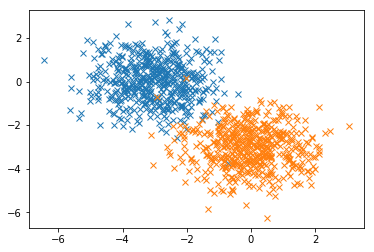

In [232]:
plt.plot(data1, data2, "x") # プロット
plt.show()

## 【課題】データ点へのラベル付け
実際に扱うデータは各データが何のグループに属しているのかラベル付けされていなければなりません。  
今回は二つの確率分布からデータをサンプリングしていますので、各500個のデータに対して、2つの確率分布のうち、  
どちらの確率分布からサンプリングされたものなのか、ラベル付けする必要があります。  

上で作成した500個×2のデータに対してラベル付けをしてください、割り当てるラベルは区別できれば何でもいいですが、  
ここでは簡単に0と1にしてください。  

やり方はたくさんありますが、ヒントを示します。  

２つの確率分布からサンプリングされたデータ(numpy配列)をnp.concatenateを用いて結合する。  
結合した行列の上から500番目までは0を割り振り、501番目~1000番目に0を割り振る。
割り振る際は、結合した配列の３列目にラベルの列を追加する。1、2列目にはすでに、各データのx座標とy座標が格納されています。

In [233]:
data1 = np.insert(data1, 2, 0, axis=1) #３列目にラベルを入力
data2 = np.insert(data2, 2, 1, axis=1)

In [234]:
data1

array([[-1.87113946,  1.31186499,  0.        ],
       [-1.99139201,  1.1490069 ,  0.        ],
       [-1.73971726, -0.27253825,  0.        ],
       ...,
       [-2.74091014, -0.31107777,  0.        ],
       [-4.04130843, -0.7713789 ,  0.        ],
       [-2.60065328, -0.60081998,  0.        ]])

In [235]:
c_data = np.concatenate([data1,data2], axis=0) #dataを合体

In [236]:
c_data

array([[-1.87113946,  1.31186499,  0.        ],
       [-1.99139201,  1.1490069 ,  0.        ],
       [-1.73971726, -0.27253825,  0.        ],
       ...,
       [-0.49063898, -4.07289349,  1.        ],
       [-0.83641363, -3.47133216,  1.        ],
       [-1.95254178, -4.96731177,  1.        ]])

## 【課題】正しくラベル付けされているか見てみる
前回の課題でも登場したmatplotlibを使って可視化しましょう。  

雛形として以下を用いてください。?の部分はご自身で考えてください。

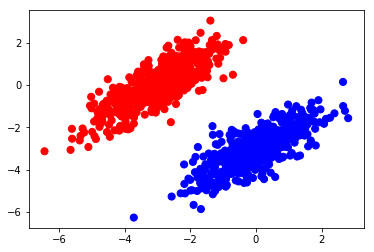

In [251]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap #インポート

#listedcolormapで色を設定し、c=ラベル列とする、cmap=([色,色])
my_cmap = ListedColormap(['red','blue'])
plt.scatter(c_data[:, 0], c_data[:, 1], c=c_data[:, 2], s=50, cmap=my_cmap,  marker='o')
plt.show()